# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2383 Жданов Антон Константинович и Ильин Павел Олегович. Вариант №13.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

# Основные теоретические положения

### Рекурсивные фильтры
Рекурсивные (БИХ-фильтры) описываются разностным уравнением:
$$y[n] = \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N} a_k y[n-k]$$
где:
- $x[n]$ - входной сигнал
- $y[n]$ - выходной сигнал  
- $a_k, b_k$ - коэффициенты фильтра

### Передаточная функция
Z-преобразование передаточной функции:
$$H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k=0}^{M} b_k z^{-k}}{1 + \sum_{k=1}^{N} a_k z^{-k}}$$

### Формула прямоугольников
**Численное интегрирование:**
$$y_n = y_{n-1} + T \cdot x_{n-1}$$
**Передаточная функция:**
$$H(z) = \frac{T}{z - 1}$$

### Формула трапеций
**Численное интегрирование:**
$$y_n = y_{n-1} + \frac{T}{2}(x_n + x_{n-1})$$
**Передаточная функция:**
$$H(z) = \frac{T}{2} \cdot \frac{z + 1}{z - 1}$$

### Формула Симпсона
**Численное интегрирование:**
$$y_{n+2} = y_n + \frac{T}{3}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$
**Передаточная функция:**
$$H(z) = \frac{T}{3} \cdot \frac{z^2 + 3z + 3 + z^{-1}}{z^2 - 1}$$


### Амплитудно-частотная характеристика (АЧХ)
$$A(\omega) = |H(e^{j\omega})|$$
Показывает усиление/ослабление гармонических составляющих.

### Фазо-частотная характеристика (ФЧХ)
$$\varphi(\omega) = \arg(H(e^{j\omega}))$$
Показывает фазовый сдвиг гармонических составляющих.

## Отношение вычисляемого значения к истинному
Для анализа точности интегрирования рассматривается отношение:
$$R(\omega) = \frac{Y(\omega)}{X(\omega)} = \frac{H(\omega)}{H_{идеал}(\omega)}$$
где $H_{идеал}(\omega) = \frac{1}{j\omega}$ - передаточная функция идеального интегратора.


##  Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики ~$H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

freqs = np.arange(0.0001, 0.5, 0.0001)
omegas = 2 * math.pi * freqs

def safe_sin(x):
    s = math.sin(x)
    return s if abs(s) > 1e-16 else 1e-16

def H_rect_imag(omega):
    return (1 / (2j * math.sin(0.5 * omega))).imag

def H_trap_imag(omega):
    return (math.cos(0.5 * omega) / (2j * math.sin(0.5 * omega))).imag

def H_simp_imag(omega):
    return ((2 + math.cos(omega)) / (3j * math.sin(omega))).imag

def Y_rect(omega):
    return (0.5 * omega) / safe_sin(0.5 * omega)

def Y_trap(omega):
    return (math.cos(0.5 * omega) * 0.5 * omega) / safe_sin(0.5 * omega)

def Y_simp(omega):
    return ((math.cos(omega) + 2) * omega) / (3 * safe_sin(omega))

def H_3_8_imag(omega):
    return ((math.cos(1.5 * omega) + math.cos(0.5 * omega)) / (8j * math.sin(1.5 * omega))).imag

def Y_3_8(omega):
    return ((math.cos(1.5 * omega) + math.cos(0.5 * omega)) * omega) / (8 * safe_sin(1.5 * omega))


# 1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

## Передаточная функция рекурсивного фильтра, соответствующего квадратурной формуле прямоугольников:

Разностное уравнение:
$$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$$

Предположим гармонический сигнал:
$$s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n}$$

Система уравнений:
$$\begin{cases}
y_{n+1} = H(\omega)e^{i\omega n} + e^{i\omega(n+0.5)} \\
y_{n+1} = H(\omega)e^{i\omega(n+1)}
\end{cases}$$

Подставляем и преобразуем:
$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + e^{i\omega(n+0.5)}$$
$$H(\omega)e^{i\omega(n+1)} - H(\omega)e^{i\omega n} = e^{i\omega(n+0.5)}$$
$$H(\omega)(e^{i\omega n}e^{i\omega} - e^{i\omega n}) = e^{i\omega n}e^{0.5i\omega}$$
$$H(\omega)(e^{i\omega} - 1) = e^{0.5i\omega}$$

Получаем передаточную функцию:
$$H(\omega) = \frac{e^{0.5i\omega}}{e^{i\omega} - 1} = \frac{1}{e^{0.5i\omega} - e^{-0.5i\omega}} = \frac{1}{2i\sin(0.5\omega)}$$

Точное значение интеграла равно:
$$\frac{e^{i\omega t}}{i\omega}$$

Отношение вычисленного значения к точному:
$$\gamma = \frac{\text{Вычисленное}}{\text{Точное}} = \frac{i\omega}{2i\sin(0.5\omega)} = \frac{0.5\omega}{\sin(0.5\omega)}$$

## Передаточная функция рекурсивного фильтра, соответствующего квадратурной формуле трапеций:

Разностное уравнение:
$$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}), \quad y_0 = 0$$

Предположим гармонический сигнал:
$$s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n}$$

Система уравнений:
$$\begin{cases}
y_{n+1} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega(n+1)}) \\
y_{n+1} = H(\omega)e^{i\omega(n+1)}
\end{cases}$$

Подставляем и преобразуем:
$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega(n+1)})$$
$$H(\omega)(e^{i\omega n}e^{i\omega} - e^{i\omega n}) = \frac{1}{2}(e^{i\omega n} + e^{i\omega n}e^{i\omega})$$
$$H(\omega)(e^{i\omega} - 1) = \frac{1}{2}(1 + e^{i\omega})$$

Получаем передаточную функцию:
$$H(\omega) = \frac{e^{i\omega} + 1}{2(e^{i\omega} - 1)} = \frac{\cos(0.5\omega)}{2i\sin(0.5\omega)}$$

Точное значение интеграла равно:
$$\frac{e^{i\omega t}}{i\omega}$$

Отношение вычисленного значения к точному:
$$\gamma = \frac{\text{Вычисленное}}{\text{Точное}} = \frac{\cos(0.5\omega) \cdot i\omega}{2i\sin(0.5\omega)} = \frac{\cos(0.5\omega) \cdot 0.5\omega}{\sin(0.5\omega)}$$

## Передаточная функция рекурсивного фильтра, соответствующего квадратурной формуле Симпсона:

Разностное уравнение:
$$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1}), \quad y_0 = 0$$

Предположим гармонический сигнал:
$$s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n}$$

Система уравнений:
$$\begin{cases}
y_{n+1} = H(\omega)e^{i\omega(n-1)} + \frac{1}{3}(e^{i\omega(n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)}) \\
y_{n+1} = H(\omega)e^{i\omega(n+1)}
\end{cases}$$

Подставляем и преобразуем:
$$H(\omega)e^{i\omega n}e^{i\omega} = H(\omega)e^{i\omega n}e^{-i\omega} + \frac{1}{3}e^{i\omega n}(e^{-i\omega} + 4 + e^{i\omega})$$
$$H(\omega)(e^{i\omega} - e^{-i\omega}) = \frac{1}{3}(e^{-i\omega} + 4 + e^{i\omega})$$

Получаем передаточную функцию:
$$H(\omega) = \frac{e^{-i\omega} + 4 + e^{i\omega}}{3(e^{i\omega} - e^{-i\omega})} = \frac{\cos(\omega) + 2}{3i\sin(\omega)}$$

Точное значение интеграла равно:
$$\frac{e^{i\omega t}}{i\omega}$$

Отношение вычисленного значения к точному:
$$\gamma = \frac{\text{Вычисленное}}{\text{Точное}} = \frac{(\cos(\omega) + 2) \cdot i\omega}{3i\sin(\omega)} = \frac{(\cos(\omega) + 2) \cdot \omega}{3\sin(\omega)}$$

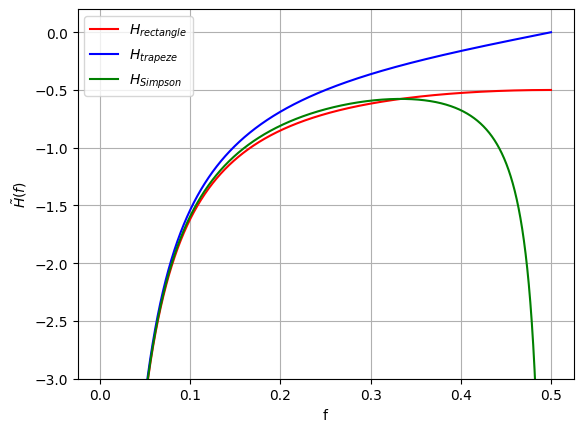

In [ ]:
H_rect_vals = np.array([H_rect_imag(w) for w in omegas])
H_trap_vals = np.array([H_trap_imag(w) for w in omegas])
H_simp_vals = np.array([H_simp_imag(w) for w in omegas])


plt.figure()
plt.plot(freqs, H_rect_vals, label='$H_{rectangle}$', color='red')
plt.plot(freqs, H_trap_vals, label='$H_{trapeze}$', color='blue')
plt.plot(freqs, H_simp_vals, label='$H_{Simpson}$', color='green')
plt.xlabel('f')
plt.ylabel('$\\tilde{H}(f)$')
plt.ylim((-3, 0.2))
plt.legend()
plt.grid()
plt.show()

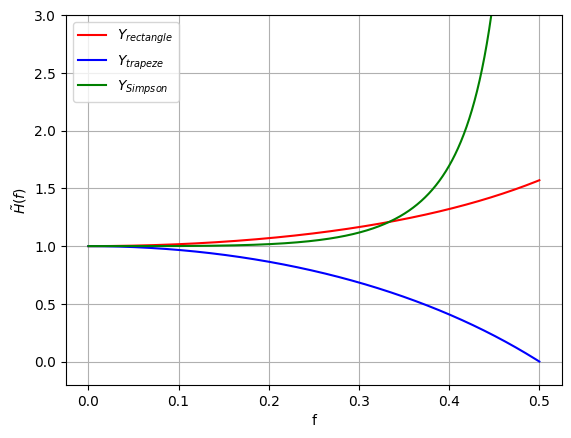

In [ ]:
Y_rect_vals = np.array([Y_rect(w) for w in omegas])
Y_trap_vals = np.array([Y_trap(w) for w in omegas])
Y_simp_vals = np.array([Y_simp(w) for w in omegas])

plt.figure()
plt.plot(freqs, Y_rect_vals, label='$Y_{rectangle}$', color='red')
plt.plot(freqs, Y_trap_vals, label='$Y_{trapeze}$', color='blue')
plt.plot(freqs, Y_simp_vals, label='$Y_{Simpson}$', color='green')
plt.xlabel('f')
plt.ylabel('$\\tilde{H}(f)$')
plt.ylim((-0.2, 3))
plt.legend()
plt.grid()
plt.show()

Все три метода действуют как низкочастотные фильтры.

Прямоугольник — самый грубый фильтр (резко ослабляет высокие частоты).

Трапеция — более «плавный» фильтр, точнее для умеренных частот.

Симпсон — наиболее точный для гладких сигналов, подавляет высокие частоты почти полностью.

Частотные свойства напрямую связаны с точностью аппроксимации интеграла для разных частот сигнала.

### 2. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»: $ y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2}+3x_{n+1}+3x_{n}+x_{n-1}) $ Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

## Передаточная функция рекурсивного фильтра, соответствующего квадратурной формуле Симпсона ("правило 3/8"):

Разностное уравнение:
$$y_{n+2} = y_{n-1} + \frac{1}{8}(s_{n+2} + 3s_{n+1} + 3s_n + s_{n-1})$$

Предположим гармонический сигнал:
$$s_n = e^{i\omega n}, \quad y_n = H(\omega)e^{i\omega n}$$

Система уравнений:
$$\begin{cases}
y_{n+2} = H(\omega)e^{i\omega(n-1)} + \frac{1}{8}(e^{i\omega(n+2)} + 3e^{i\omega(n+1)} + 3e^{i\omega n} + e^{i\omega(n-1)}) \\
y_{n+2} = H(\omega)e^{i\omega(n+2)}
\end{cases}$$

Подставляем и преобразуем:
$$H(\omega)e^{i\omega(n+2)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{8}(e^{i\omega(n+2)} + 3e^{i\omega(n+1)} + 3e^{i\omega n} + e^{i\omega(n-1)})$$
$$H(\omega)(e^{2i\omega} - e^{-i\omega}) = \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

Получаем передаточную функцию:
$$H(\omega) = \frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})} = \frac{e^{1.5i\omega} + 3e^{0.5i\omega} + 3e^{-0.5i\omega} + e^{-1.5i\omega}}{8(e^{1.5i\omega} - e^{-1.5i\omega})}$$
$$H(\omega) = \frac{2\cos(1.5\omega) + 6\cos(0.5\omega)}{16i\sin(1.5\omega)} = \frac{\cos(1.5\omega) + 3\cos(0.5\omega)}{8i\sin(1.5\omega)}$$

Точное значение интеграла равно:
$$\frac{e^{i\omega t}}{i\omega}$$

Отношение вычисленного значения к точному:
$$\gamma = \frac{\text{Вычисленное}}{\text{Точное}} = \frac{(\cos(1.5\omega) + 3\cos(0.5\omega)) \cdot i\omega}{8i\sin(1.5\omega)} = \frac{(\cos(1.5\omega) + 3\cos(0.5\omega)) \cdot \omega}{8\sin(1.5\omega)}$$
$$\gamma = \frac{1}{12}(\cos(1.5\omega) + 3\cos(0.5\omega)) \cdot \frac{1.5\omega}{\sin(1.5\omega)}$$

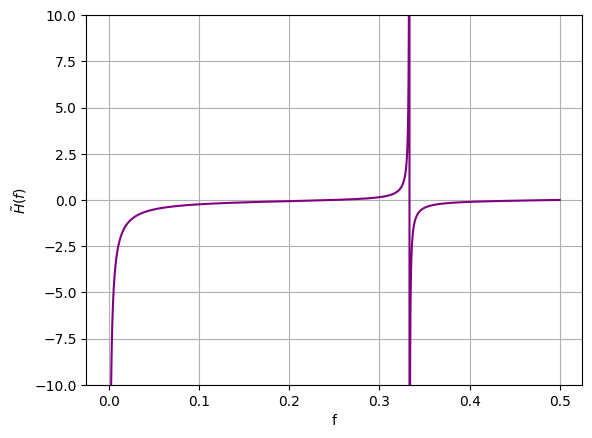

In [ ]:
H38_vals = np.array([H_3_8_imag(w) for w in omegas])

plt.figure()
plt.plot(freqs, H38_vals, color='purple')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-10, 10))
plt.grid()
plt.show()

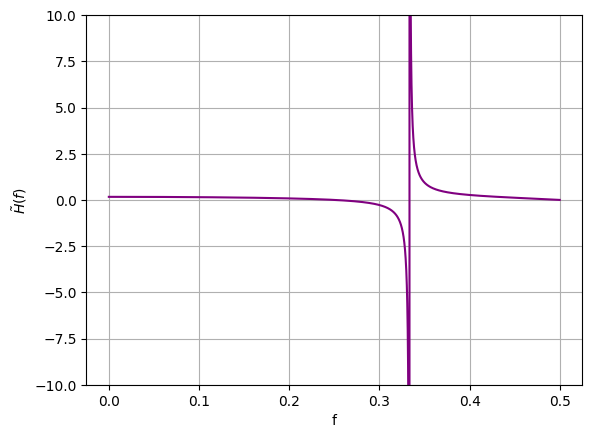

In [ ]:
Y38_vals = np.array([Y_3_8(w) for w in omegas])

plt.figure()
plt.plot(freqs, Y38_vals, color='purple')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-10, 10))
plt.grid()
plt.show()

Фильтр по правилу 3/8 действует как низкочастотный фильтр с мягким спадом, более точный, чем прямоугольник или трапеция, для гладких функций. Он сохраняет низкочастотные компоненты и подавляет высокочастотные, что снижает шум в процессе интегрирования.

## 3. Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

Все исследуемые рекурсивные фильтры демонстрируют значительные искажения вблизи нулевой частоты, характерные для интеграторов, однако их высокочастотное поведение существенно различается: формула Симпсона показывает резкий спад АЧХ около 0.5 Гц с дополнительной асимптотой в районе 0.33 Гц, вызывающей сильные искажения, и асимптотически стремится к нулю; формула прямоугольников обеспечивает умеренное подавление высоких частот, в то время как формула трапеций полностью подавляет высокочастотные составляющие сигнала, проявляя наиболее агрессивные фильтрующие свойства.



# Выводы


В ходе работы были реализованы рекурсивные фильтры, соответствующие квадратурным формулам прямоугольника, трапеции и Симпсона, и построены их частотные характеристики.

Анализ показал, что точность интегрирования и подавление высокочастотного шума увеличиваются с ростом порядка формулы: прямоугольник даёт грубое приближение, трапеция точнее, а Симпсон — наиболее точен.

Таким образом, выбор квадратурной формулы напрямую влияет на частотные свойства рекурсивного интегратора и качество вычисленного интеграла.

